# Calculating $p$-Values

The simplest and most common test for statistical significance is to estimate a $p$-value from the data, where $p$ is the probability of seeing a test difference  "at least as extreme" as the observed difference in summary statistics, $\Delta$, **under the null hypothesis**. Let $E$ be the event that a test difference $\tilde{\Delta}$ for a random sample from the pooled data is "at least as extreme" as $\Delta$. Then we use the notation $P(E|H_0)$ to denote the probability that $E$ occurs **under the null hypothesis**. (The vertical bar "|" denotes a conditional probability, and we delve more into the meaning of these types of probabilities in {doc}`Chapter 6<../06-conditional-prob/intro>`.)


To estimate $p$ using resampling, we use a simulation of the form described in the last section. We estimate $P(E|H_0)$ by using the relative frequency 

$$
r_E(N) = \frac{ n_E(N)}{N},
$$
where $n_E(N)$ is the number of times $E$ is observed in $N$ trials. The only remaining issue to resolve is how to determine whether $E$ occurred based on the simulated test differences, $\Delta_i$.

## One-Tail or Two-Tail Tests

NHSTs are classified as one-tailed or two-tailed (also called one-sided or two-sided) based on the way that "at least as extreme" as $\Delta$ is interpreted.  Consider again our  statistical questions from the last section:
1. Is the observed difference in median wealth ($\Delta = 57,400$) between the undergrad and grad groups statistically significant?
2. Is the observed difference in the relative frequency of millionaires between the undergrad and grad groups ($\Delta \approx 0.053$) statistically significant?



Let's use the first one of these as an example to understand one-tailed versus two-tailed tests, let $\tilde{U}_i$ and $\tilde{G}_i$ denote the **observed median values** for the $i$th undergrad and grad samples. Recall that we previously defined $\Delta_i = \tilde{G}_i - \tilde{U}_i$.


In many statistical tests, under the null hypothesis, the difference between summary statistics will result in values that are equally likely to be positive and negative, with most of the values centered around 0. (In Chapters 8 and 9, we will introduce formal terminology for this: the difference has zero mean and its distribution is symmetric around the mean.)

Below is an example that shows the type of histrogram that we expect to encounter.

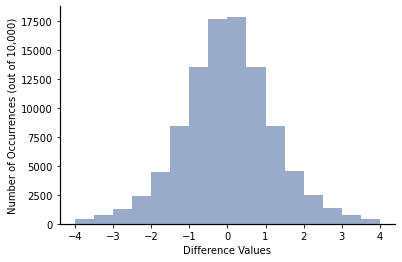

In [4]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
T=stats.t(4)
tvals=T.rvs(100_000)
plt.hist(tvals, bins =np.arange(-4,4.5,0.5), alpha=0.5 );
plt.xlabel('Difference Values')
plt.ylabel('Number of Occurrences (out of 10,000)');

In this histogram, the values with the higher counts correspond to those with higher probability of occurring. The way the probabilities map to the values is called the *distribution* of the random values. (Again, this is discussed in more detail in Chapter 8.) We can define the *mode* for a distribution of random values:


````{panels}
DEFINITION
^^^
```{glossary}
mode(s) of a distribution    
    For a distribution of random values,  the value(s) with the maximum probability (or probability density -- see Chapter 8) are the *modes* of the distribution.
```
````


We can also classify the type of distribution based on how many modes it has. The most common case, and the main one we will utilize in this book is when a distribution has a single mode:

````{panels}
DEFINITION
^^^
```{glossary}
unimodal distribution    
   A distribution of random values that has a single mode.
```
````



Because the total probability in the distribution must be 1, most unimodal distributions  have the probability decrease as the values get farther from the mode of the distribution. We can then define a *tail probability*:


````{panels}
DEFINITION
^^^
```{glossary}
tail probability
    For a unimodal distribution in which the probabilities decrease as some function of the distance from the mode, a *tail probability* is the probability of being at least some distance from the mode.
```
````


There are two types of tail probabilities: one-sided tails and two-sided tails. A one-sided tail can be written as either 

### One-tailed Test

A one-tailed test is **concerned about the particular direction of the observed difference** in test statistics between the two groups. A one-tailed test on median wealth estimates the probability of the grad group's median wealth at least \\$57,400 higher than the undergrad group's median wealth, under $H_0$. For a given test difference $\Delta_i$, we say that $E$ occurs if $\Delta_i \ge 57,400$. Thus the one-tailed test estimate $P( \Delta_i > 57,400 |H_0)$. 




If we collected all the values of $\Delta_i$ in our simulation into an NumPy array `diffs`, then we can calculate the relative frequency of the observed difference `Delta_i` exceeding a threshold `thresh`,  by
* comparing the array to the threshold `diffs >= thresh`, and
* counting the number of `True` values; since `False` is counted as zero, we can do `np.count_nonzero(diffs >= thresh)`
* dividing the number of values where `diffs >=thresh` by the number of simulated test differences





Below we illustrate this idea by generating an array of 100 random values in the interval $[-0.5, 0.5)$ to represent an array of simulated differences. We estimate the probability that the simulated differences are bigger than 0.9. Run this code a few times and observe the outcomes. Increase the number of simulated differences to 100,000. What do you observe?

In [54]:
import numpy as np
import numpy.random as npr

num_sims=100
thresh = 0.4

diffs = npr.rand(num_sims) - 0.5 # Random values on [-0.5, 0.5)
np.count_nonzero( diffs >= thresh) / num_sims

0.09

Note that if we only wish to estimate the $p$-value, then there is no need to store all the test differences. We can instead initialize a counter to 0 at the beginning of the simulation and then increment the counter for each test difference that exceeds the threshold.


**Two-sided Test**

A two-sided test is only concerned that the test statistics of the two groups differ by at least as much as the observed difference $\Delta$; it is **not concerned with the direction of the difference**. A two-sided test on median wealth estimates the probability that the difference in wealth between the two groups is at least \\$57,400. Unpacking the last sentence a bit, $E$ occurs if *either* $ \tilde{G}_i - \tilde{U}_i \ge 57,400$ **or** $ \tilde{U}_i - \tilde{G}_i \ge 57,400$. These two cases are mutually exclusive, and we can writ them in shorter notation as $|\tilde{G}_i - \tilde{U}_i | \ge 57,400$, which is the same as $|\Delta_i|  \ge 57,400$, where the vertical bars indicate absolute value. Thus, the two sided test estimates 

$$
P\bigl(|\Delta_i| > 57,400 \bigl \vert H_0 \bigr .\bigr).
$$ 
In this last expression, the first pair of vertical bars indicate absolute value, whereas the last vertical bar indicates that we are calculating this probability under the null hypothesis, $H_0$.



Given an array `diffs` of all the values of $\Delta_i$ in our simulation, we can calculate the relative frequency of the absolute value of the difference `Delta_i` exceeding a threshold `thresh`  by
* comparing the absolute value of the array to the threshold `np.abs(diffs) >= thresh`, and
* counting the number of `True` values; since `False` is counted as zero, we can do `np.count_nonzero( np.abs(diffs) >= thresh)`
* dividing the number of values where `np.abs(diffs) >=thresh` by the number of simulated test differences

The Python code is just a minor modification of that for the one-sided test: we just take the *absolute value* of the test differences before comparing them to the threshold:

In [56]:
import numpy as np
import numpy.random as npr

num_sims=1000
thresh = 0.4

diffs = npr.rand(num_sims) - 0.5
np.count_nonzero( np.abs(diffs) >= thresh) / num_sims

0.21

Note that the $p$-value for the two-sided test is always higher than for the one-sided test because the two-sided probability  is the union of the one-sided probability with another probability. 

## Choosing Between a One-Sided or Two-Sided Test

